# Recurrent Neural Networks

## Counting Parameters

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

### Simple RNN

In [3]:
sequence_length = 120
input_features = 20
output_features = 32

#### Sequential API

In [4]:
# Build the model
model = keras.Sequential()
model.add(keras.Input(shape=(sequence_length, input_features)))
model.add(layers.SimpleRNN(output_features))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,729 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

$$
h^{(t)} = \phi(W_{hh}h^{(t-1)} + W_{hx}x^{(t)} + b_h)
$$

**Number of parameters**

`W_hh`: `out_features` $\times$ `out_features`

`W_hx`: `out_features` $\times$ `input_features`

`b_h`: `out_features`

In [6]:
output_features**2 + output_features*input_features + output_features

1696

#### Functional API

In [7]:
# Forward pass
inputs = keras.Input(shape=(sequence_length, input_features))
x = layers.SimpleRNN(output_features)(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)

# Build the model
model = keras.Model(inputs, outputs)

In [8]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 120, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         1,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,729 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

### LSTM

In [9]:
sequence_length = 120
input_features = 10
output_features = 32

In [10]:
# Forward pass
inputs = keras.Input(shape=(sequence_length, input_features))
x = layers.LSTM(output_features)(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)

# Build the model
model = keras.Model(inputs, outputs)

In [11]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 120, 10)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,537 (21.63 KB)

 Trainable params: 5,537 (21.63 KB)

 Non-trainable params: 0 (0.00 B)

Recurrent units:

\begin{eqnarray}
f^{(t)} &=& \sigma(W_{hf}h^{(t-1)} + W_{xf}x^{(t)} + b_f) \\
i^{(t)} &=& \sigma(W_{hi}h^{(t-1)} + W_{xi}x^{(t)} + b_i) \\
g^{(t)} &=& \tanh(W_{hg}h^{(t-1)} + W_{xg}x^{(t)} + b_g) \\
o^{(t)} &=& \sigma(W_{ho}h^{(t-1)} + W_{xo}x^{(t)} + b_o) \\
\end{eqnarray}

Cell state:
$$
C^{(t)} = f \cdot C^{(t-1)} + i \cdot g
$$

Hidden state:

$$
h^{(t)} = o^{(t)} \cdot \tanh(C^{(t)})
$$

**Number of parameters**

`W_hf` = `W_hi` = `W_hg` = `W_ho` = `output_features` x `output_features`

`W_xf` = `W_xi` = `W_xg` = `W_xo` = `output_features` x `input_features`

`b_f` = `b_i` = `b_g` = `b_o` = `output_features`

In [12]:
4*(output_features**2 + output_features*input_features + output_features)

5504

### GRU (v3)

In [13]:
sequence_length = 120
input_features = 10
output_features = 32

In [14]:
# Forward pass
inputs = keras.Input(shape=(sequence_length, input_features))
x = layers.GRU(output_features, reset_after=False)(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)

# Build the model
model = keras.Model(inputs, outputs)

In [15]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 120, 10)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,161 (16.25 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 0 (0.00 B)

Recurrent units:

\begin{eqnarray}
r^{(t)} &=& \sigma(W_{hr}h^{(t-1)} + W_{xr}x^{(t)} + b_r) \\
z^{(t)} &=& \sigma(W_{hz}h^{(t-1)} + W_{xz}x^{(t)} + b_z) \\
o^{(t)} &=& \tanh(W_{ro}(r^{(t)} \cdot h^{(t-1)}) + W_{xo}x^{(t)} + b_o) = \tilde{h}^{(t)}\\
\end{eqnarray}

Hidden state:

$$
h^{(t)} = (1-z^{(t)}) \cdot h^{(t-1)} + z^{(t)} \cdot \tilde{h}^{(t)}
$$

**Number of parameters**

`W_hr` = `W_hz` = `W_ro` = `output_features` x `output_features`

`W_xr` = `W_xz` = `W_xo` `output_features` x `input_features`

`b_r` = `b_z` = `b_o` = `output_features`

In [16]:
3*(output_features**2 + output_features*input_features + output_features)

4128

### GRU (v1)

In [17]:
sequence_length = 120
input_features = 10
output_features = 32

In [18]:
# Forward pass
inputs = keras.Input(shape=(sequence_length, input_features))
x = layers.GRU(output_features)(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)

# Build the model
model = keras.Model(inputs, outputs)

In [19]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 120, 10)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,257 (16.63 KB)

 Trainable params: 4,257 (16.63 KB)

 Non-trainable params: 0 (0.00 B)

Recurrent units:

\begin{eqnarray}
r^{(t)} &=& \sigma[(W_{hr}h^{(t-1)} + b_{hr}) + (W_{xr}x^{(t)} + b_{xr})] \\
z^{(t)} &=& \sigma[(W_{hz}h^{(t-1)} + b_{hz}) + (W_{xz}x^{(t)} + b_{xz})] \\
o^{(t)} &=& \tanh(r^{(t)} \cdot (W_{ro}(h^{(t-1)}) + b_{ro}) + (W_{xo}x^{(t)} + b_{xo})] = \tilde{h}^{(t)}\\
\end{eqnarray}

Hidden state:

$$
h^{(t)} = (1-z^{(t)}) \cdot h^{(t-1)} + z^{(t)} \cdot \tilde{h}^{(t)}
$$

**Number of parameters**

`W_hr` = `W_hz` = `W_ro` = `output_features` x `output_features`

`W_xr` = `W_xz` = `W_xo` `output_features` x `input_features`

`b_xr` = `b_xz` = `b_xo` = `output_features`

`b_hr` = `b_hz` = `b_ho` = `output_features`

In [20]:
3*(output_features**2 + output_features*input_features + 2*output_features)

4224

## Time Series Forecasting using RNNs

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False
})

### Data Loading

In [22]:
# # Uncomment to download data
# !wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# !unzip jena_climate_2009_2016.csv.zip

The dataset comprise of 14 different quantities (such as temperature, pressure, humidity, wind direction, etc.) recorded every 10 minutes over several years.

Problem formulation: given data covering the previous five days and sampled once per hour, can we predict the temperature in the next 24 hours?

In [23]:
data = pd.read_csv('jena_climate_2009_2016.csv').iloc[:, 1:]

### Data Exploration

In [24]:
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [25]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000,420451.000000
mean,989.212508,9.448567,283.491182,4.954011,76.007045,13.575089,9.532524,4.042483,6.021630,9.638982,1216.069883,2.130309,3.532381,174.726164
std,8.359454,8.423685,8.504820,6.730411,16.477126,7.739481,4.183895,4.897270,2.655973,4.235130,39.977065,1.541830,2.340482,86.675965
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,0.000000,0.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.800000
50%,989.570000,9.410000,283.460000,5.210000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.800000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.480000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,14.630000,23.500000,360.000000


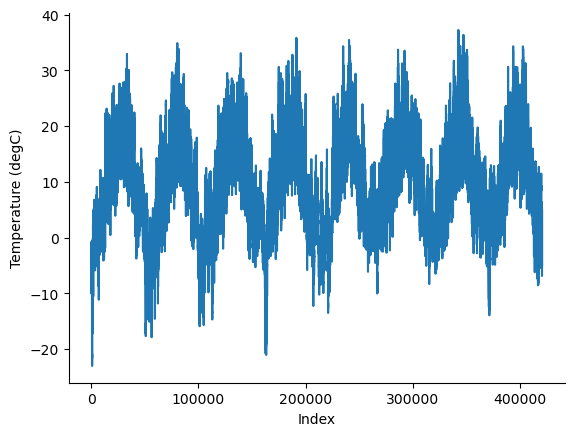

In [26]:
ax = data['T (degC)'].plot()
ax.set_ylabel('Temperature (degC)')
ax.set_xlabel('Index');

### Data Segregation

In [27]:
num_train_samples = int(0.5 * len(data))
num_val_samples = int(0.25 * len(data))
num_test_samples = len(data) - num_train_samples - num_val_samples

In [28]:
print(f"Number of Training Samples: {num_train_samples}")
print(f"Number of Validation Samples: {num_val_samples}")
print(f"Number of Test Samples: {num_test_samples}")

Number of Training Samples: 210225
Number of Validation Samples: 105112
Number of Test Samples: 105114


### Data Preparation

In [29]:
# Data normalization
mean = data.mean()
std = data.std()
raw_data = (data - mean) / std

Utilize `timeseries_dataset_from_array()` with the following parameters:

`sampling_rate`: `6` - observations will be sampled at one data point per hour. We will only keep one data point out of 6.
`sequence_length`: `120` - observations will go back 5 days (120 hours).
`delay`: `sampling_rate * (sequence_length + 24 - 1)` - The target for a sequence will be the temperature 24 hours after the end of the sequence.

In [30]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [31]:
help(keras.utils.timeseries_dataset_from_array)

Help on function timeseries_dataset_from_array in module keras.src.utils.timeseries_dataset_utils:

timeseries_dataset_from_array(data, targets, sequence_length, sequence_stride=1, sampling_rate=1, batch_size=128, shuffle=False, seed=None, start_index=None, end_index=None)
    Creates a dataset of sliding windows over a timeseries provided as array.
    
    This function takes in a sequence of data-points gathered at
    equal intervals, along with time series parameters such as
    length of the sequences/windows, spacing between two sequence/windows, etc.,
    to produce batches of timeseries inputs and targets.
    
    Args:
        data: Numpy array or eager tensor
            containing consecutive data points (timesteps).
            Axis 0 is expected to be the time dimension.
        targets: Targets corresponding to timesteps in `data`.
            `targets[i]` should be the target
            corresponding to the window that starts at index `i`
            (see example 2 be

In [32]:
train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data.to_numpy()[:-delay],
    targets=data['T (degC)'].to_numpy()[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data.to_numpy()[:-delay],
    targets=data['T (degC)'].to_numpy()[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data.to_numpy()[:-delay],
    targets=data['T (degC)'].to_numpy()[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples
)

In [33]:
# Shape check
for samples, targets in train_dataset:
    print(f"Samples shape: {samples.shape}")
    print(f"Targets shape: {targets.shape}")
    break

Samples shape: (256, 120, 14)
Targets shape: (256,)


### Creating a Baseline

#### Naive Baseline

A common-sense approach is to always predict that the temperature 24 hours from now will be equal to the temperature right now.

In [34]:
import numpy as np

In [35]:
def naive_baseline(dataset):
    total_absolute_error = 0
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std['T (degC)'] + mean['T (degC)']
        total_absolute_error += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]

    return total_absolute_error / samples_seen

In [36]:
print(f"Validation MAE: {naive_baseline(val_dataset):.2f}")
print(f"Test MAE: {naive_baseline(test_dataset):.2f}")
mae_results = {}
mae_results['naive'] = naive_baseline(test_dataset)

Validation MAE: 2.44
Test MAE: 2.62


#### Basic Machine Learning Model

In [37]:
# Simple dense NN
inputs = keras.Input(shape=(sequence_length, data.shape[-1]))
x = layers.Reshape((sequence_length*data.shape[-1],))(inputs)
x = layers.Dense(
    16, input_shape=(sequence_length*data.shape[-1],), activation='relu')(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

/home/llorenzo/.conda/envs/msds2024-ml3-rnn/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 120, 14)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1680)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │        26,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,913 (105.13 KB)

 Trainable params: 26,913 (105.13 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Model checkpointing
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_dense.keras', save_best_only=True)
]
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [40]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 26.8693 - mae: 3.8388 - val_loss: 11.0812 - val_mae: 2.6293
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 9.2874 - mae: 2.4084 - val_loss: 10.3344 - val_mae: 2.5319
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 8.4070 - mae: 2.2897 - val_loss: 10.1487 - val_mae: 2.5041
Epoch 4/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 7.9154 - mae: 2.2175 - val_loss: 11.6737 - val_mae: 2.7167
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 7.5564 - mae: 2.1637 - val_loss: 10.5500 - val_mae: 2.5698
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 7.2095 - mae: 2.1147 - val_loss: 10.7373 - val_mae: 2.5628
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 6.9954 - mae: 2.0817 - val_loss: 10.8232 - val_mae: 2.5759
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 6.7719 - mae: 2.0462 - val_loss: 11.0932 - val_mae: 2.6323
Epoch 9/10
819/819 ━━━━━━━━━━━━

In [41]:
def plot_history(history):
    loss = history.history['mae']
    val_loss = history.history['val_mae']
    epochs = range(1, len(loss) + 1)

    fig, ax = plt.subplots()

    ax.plot(epochs, loss, 'o', color='tab:blue', label='Training MAE')
    ax.plot(epochs, val_loss, color='tab:blue', label='Validation MAE')
    ax.legend(bbox_to_anchor=(1., 1.))
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Mean Absolute Error")

    return fig, ax

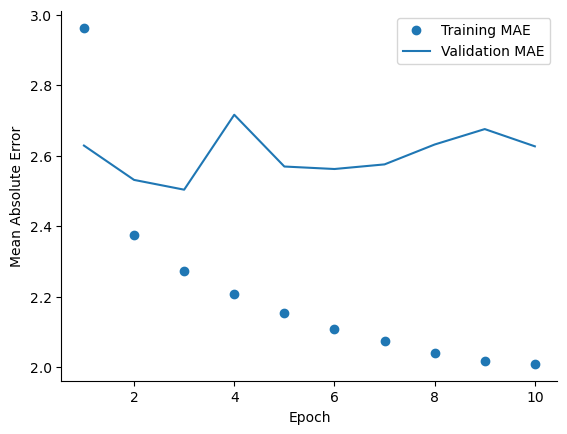

In [42]:
fig, ax = plot_history(history)

In [43]:
model = keras.models.load_model("jena_dense.keras")
mae_results['dense'] = model.evaluate(test_dataset)[1]
print(f"Test MAE: {mae_results['dense']:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 11.4725 - mae: 2.6437
Test MAE: 2.65


### RNN Models

#### LSTM

In [44]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [45]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 120, 14)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Model checkpointing
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_lstm.keras', save_best_only=True)
]
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [47]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 79.7888 - mae: 6.8948 - val_loss: 13.7702 - val_mae: 2.7921
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 12.9717 - mae: 2.7567 - val_loss: 9.6589 - val_mae: 2.4191
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 10.2207 - mae: 2.4881 - val_loss: 9.3134 - val_mae: 2.3834
Epoch 4/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 9.6837 - mae: 2.4284 - val_loss: 10.1810 - val_mae: 2.4745
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 9.3300 - mae: 2.3771 - val_loss: 9.9192 - val_mae: 2.4406
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 9.0256 - mae: 2.3354 - val_loss: 10.2217 - val_mae: 2.4720
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 8.8016 - mae: 2.3045 - val_loss: 10.1448 - val_mae: 2.4644
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 8.6565 - mae: 2.2886 - val_loss: 10.0057 - val_mae: 2.4532
Epoch 9/10
819/819 ━━━━━━━━━━━━━

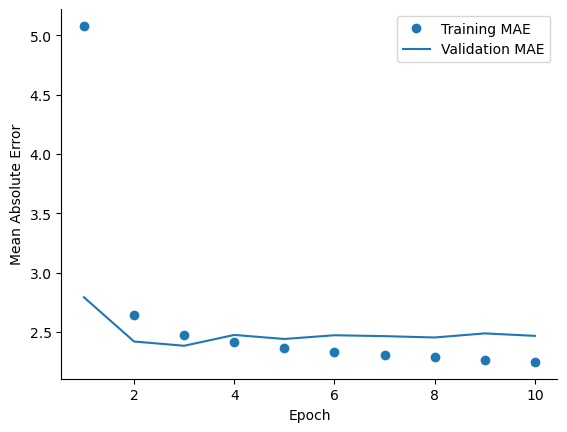

In [48]:
fig, ax = plot_history(history)

In [49]:
model = keras.models.load_model("jena_lstm.keras")
mae_results['lstm'] = model.evaluate(test_dataset)[1]
print(f"Test MAE: {mae_results['lstm']:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 10.4630 - mae: 2.5453
Test MAE: 2.55


#### GRU (v1)

In [57]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [58]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 120, 14)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 16)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,553 (6.07 KB)

 Trainable params: 1,553 (6.07 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Model checkpointing
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_gruV1.keras', save_best_only=True)
]
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [60]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 79.7287 - mae: 6.8714 - val_loss: 13.5935 - val_mae: 2.7560
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 11.5526 - mae: 2.6219 - val_loss: 9.3703 - val_mae: 2.3685
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - loss: 9.5752 - mae: 2.4198 - val_loss: 9.7214 - val_mae: 2.4018
Epoch 4/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 9.1917 - mae: 2.3690 - val_loss: 9.2234 - val_mae: 2.3526
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 8.9511 - mae: 2.3395 - val_loss: 9.2915 - val_mae: 2.3521
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 8.7549 - mae: 2.3146 - val_loss: 9.3842 - val_mae: 2.3614
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 8.5985 - mae: 2.2956 - val_loss: 9.3376 - val_mae: 2.3542
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - loss: 8.4570 - mae: 2.2783 - val_loss: 9.6818 - val_mae: 2.3870
Epoch 9/10
819/819 ━━━━━━━━━━━━━━━━━━

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Epoch', ylabel='Mean Absolute Error'>)

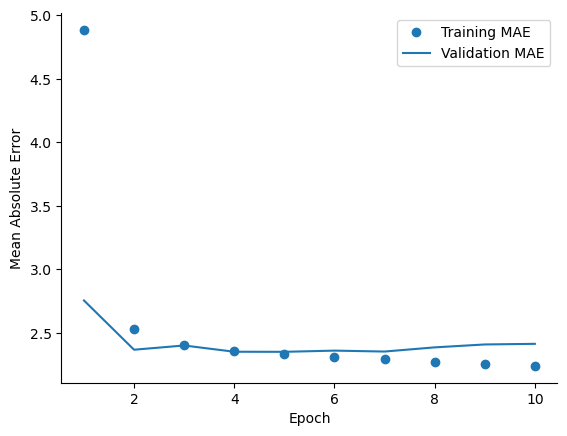

In [61]:
plot_history(history)

In [62]:
model = keras.models.load_model("jena_gruV1.keras")
mae_results['gruV1'] = model.evaluate(test_dataset)[1]
print(f"Test MAE: {mae_results['gruV1']:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 9.7698 - mae: 2.4488
Test MAE: 2.46


#### GRU (v3)

In [63]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(16, reset_after=False)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [64]:
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 120, 14)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Model checkpointing
callbacks = [
    keras.callbacks.ModelCheckpoint('jena_gruV3.keras', save_best_only=True)
]
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [66]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - loss: 74.1876 - mae: 6.5533 - val_loss: 12.6924 - val_mae: 2.6743
Epoch 2/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 11.0635 - mae: 2.5695 - val_loss: 10.1265 - val_mae: 2.4379
Epoch 3/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 9.5640 - mae: 2.4107 - val_loss: 10.1795 - val_mae: 2.4479
Epoch 4/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 9.2875 - mae: 2.3752 - val_loss: 10.5172 - val_mae: 2.4761
Epoch 5/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 9.1161 - mae: 2.3549 - val_loss: 10.5592 - val_mae: 2.4872
Epoch 6/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 8.9580 - mae: 2.3380 - val_loss: 10.3758 - val_mae: 2.4738
Epoch 7/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - loss: 8.8117 - mae: 2.3211 - val_loss: 10.5977 - val_mae: 2.4897
Epoch 8/10
819/819 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - loss: 8.6670 - mae: 2.3033 - val_loss: 10.0913 - val_mae: 2.4534
Epoch 9/10
819/819 ━━━━━━━━━━━

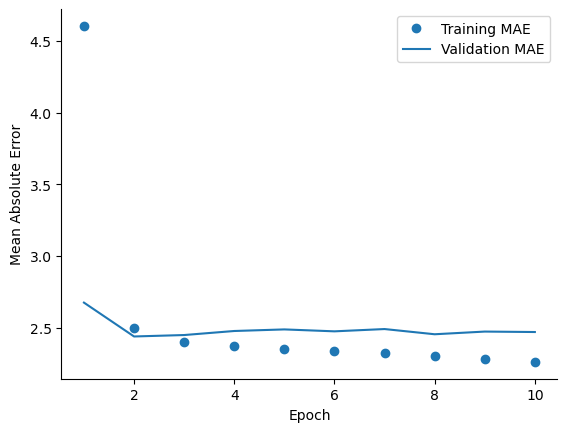

In [67]:
fig, ax = plot_history(history)

In [68]:
model = keras.models.load_model("jena_gruV3.keras")
mae_results['gruV3'] = model.evaluate(test_dataset)[1]
print(f"Test MAE: {mae_results['gruV3']:.2f}")

405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 9.8998 - mae: 2.4803
Test MAE: 2.48


### Summary of Results

In [69]:
pd.Series(mae_results).to_frame('MAE')

,MAE
naive,2.622036
dense,2.646424
lstm,2.551457
gruV1,2.455552
gruV3,2.483539


## Supplementary Readings

1. https://svail.github.io/diff_graphs/
2. https://colah.github.io/posts/2015-08-Understanding-LSTMs/
3. https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
4. https://medium.com/@ayeshashabbirshabbirahmad/understanding-rnn-lstm-and-gru-architectures-and-challenges-in-processing-long-sequences-71cf62b300b2